In [11]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [12]:
tennis_df = pd.read_csv('C:/Users/kimta/Introduction to Machine Learning/raw_data/PlayTennis.csv')
tennis_df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [13]:
tennis_df[['Outlook', 'Wind', 'Play']]

,Outlook,Wind,Play
0,Sunny,Weak,No
1,Sunny,Strong,No
2,Overcast,Weak,Yes
3,Rain,Weak,Yes
4,Rain,Weak,Yes
5,Rain,Strong,No
6,Overcast,Strong,Yes
7,Sunny,Weak,No
8,Sunny,Weak,Yes
9,Rain,Weak,Yes


# Change Data Types

In [14]:
tennis_df.Outlook = tennis_df.Outlook.replace('Sunny',1)
tennis_df.Outlook = tennis_df.Outlook.replace('Overcast', 2)
tennis_df.Outlook = tennis_df.Outlook.replace('Rain',3)

tennis_df.Wind = tennis_df.Wind.replace('Strong',1)
tennis_df.Wind = tennis_df.Wind.replace('Weak',0)

tennis_df

,Outlook,Temperature,Humidity,Wind,Play
0,1,Hot,High,0,No
1,1,Hot,High,1,No
2,2,Hot,High,0,Yes
3,3,Mild,High,0,Yes
4,3,Cool,Normal,0,Yes
5,3,Cool,Normal,1,No
6,2,Cool,Normal,1,Yes
7,1,Mild,High,0,No
8,1,Cool,Normal,0,Yes
9,3,Mild,Normal,0,Yes


In [15]:
X = tennis_df[['Outlook', 'Wind']]
y = tennis_df[['Play']]
X

,Outlook,Wind
0,1,0
1,1,1
2,2,0
3,3,0
4,3,0
5,3,1
6,2,1
7,1,0
8,1,0
9,3,0


# Run a tree-decision ML

In [18]:
dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=3,random_state=100)
dt_clf = dt_clf.fit(X, y)

# Visualizing decision trees

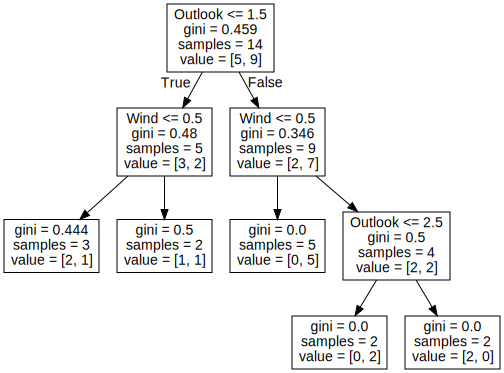

In [19]:
import graphviz
dot_data = tree.export_graphviz(dt_clf, 
                         feature_names=['Outlook','Wind'],)
graph = graphviz.Source(dot_data)  
graph

In [8]:
print("Feature importances:", dt_clf.feature_importances_)

Feature importances: [0.43787879 0.56212121]


In [10]:
testing = {'Outlook': [1], 'Wind': [1]}
df2 = pd.DataFrame(testing)

dt_prediction = dt_clf.predict(df2)
dt_prediction

array(['No'], dtype=object)